Use unadulterated dataset https://www.floydhub.com/helly/datasets/whales

In [5]:
data_dir = "/floyd/input/whales/"

In [2]:
from fastai import *
from fastai.vision import *
import pandas as pd
import numpy as np

In [3]:
# batch size
bs = 64

In [7]:
# see what is in the data
path = Path(data_dir)
path.ls()

[PosixPath('/floyd/input/whales/test'),
 PosixPath('/floyd/input/whales/sample_submission.csv'),
 PosixPath('/floyd/input/whales/train.csv'),
 PosixPath('/floyd/input/whales/train')]

In [8]:
labels = pd.read_csv(path/'train.csv')

In [9]:
labels.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [14]:
len(labels['Id'].unique())

5005

In [28]:
labels['Id'].value_counts().head()

new_whale    9664
w_23a388d      73
w_9b5109b      65
w_9c506f6      62
w_0369a5c      61
Name: Id, dtype: int64

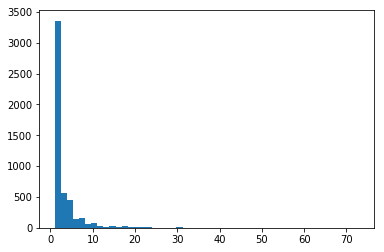

In [30]:
plt.hist(labels[labels['Id']!='new_whale']['Id'].value_counts(), bins=50);

In [12]:
doc(ImageDataBunch.from_csv)

from_csv [source] from_csv ( `path` : PathOrStr , `folder` : PathOrStr = `'.'` , `sep` = `None` , `csv_labels` : PathOrStr = `'labels.csv'` , `valid_pct` : float = `0.2` , `fn_col` : int = `0` , `label_col` : int = `1` , `suffix` : str = `''` , `header` : Union [ int , str , NoneType ]= `'infer'` , `kwargs` : Any ) → ImageDataBunch 
 
 Create from a csv file in path/csv_labels . 
 Show in docs

In [19]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path=path, folder='train', csv_labels='train.csv', test='test', 
                               size=224, bs=bs) #.normalize(imagenet_stats)

Exception: Your validation data contains a label that isn't present in the training set, please fix your data.